Data Analysis:

1.) As would be expected, the majority of the ride sharing market is in the urban market type. The urban market dominates the number of drivers, number of rides and total fares. 
2.) A key takeaway from this is that the urban market is much more competitive and less lucrative per driver than the rural and suburban markets. Rural and suburban drivers account for only 13.9% of total drivers yet produce 37% of total fares. This can be compared to the urban market, where 86.2% of total drivers produce 63% of total fares. Rural and Suburban drivers are farther away from areas of interest, producing longer rides and larger fares. Increased competition and proximity to points of interest for urban drivers affect their bottom line. 
3.) In my opinion it would be worth exploring placing a limit on the number of drivers in the urban market. The market appears to be over saturdated. Without further analysis the following hypothesis is merely hypothetical but it could be surmised that drivers in the urban market exhibit lower sentiment regarding their job as a driver than urban and suburban drivers. Competition in a market is good, but as with anything, only to a certain limit. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
city_file = os.path.join('Resources', 'city_data.csv')
ride_file = os.path.join('Resources', 'ride_data.csv')

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

city_df = city_df.drop_duplicates('city', keep = 'first')
merged_df = city_df.merge(ride_df, on = 'city')
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


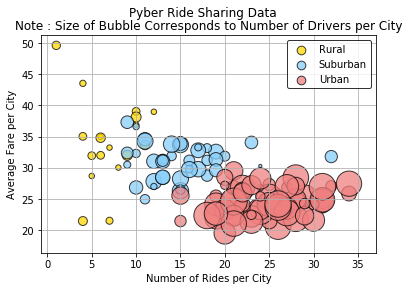

In [3]:
groupby_city = merged_df.groupby('city')
avg_fare = groupby_city.mean()['fare']
ride_count = groupby_city['ride_id'].count()
driver_count = groupby_city.mean()['driver_count']

city_type = city_df.set_index('city')['type']

city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

plt.suptitle('Pyber Ride Sharing Data')
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.grid()
plt.show()

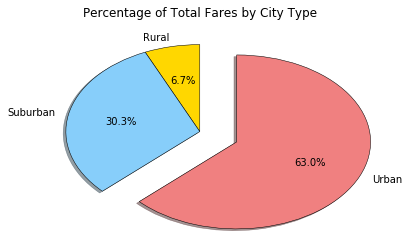

In [4]:
groupby_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fare_sum = groupby_type.sum()['fare']

labels = fare_sum.index

colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.title('Percentage of Total Fares by City Type')
plt.show()

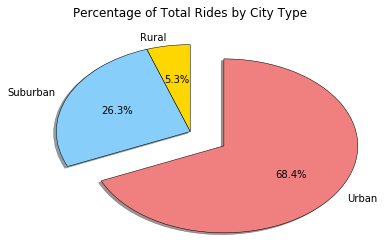

In [5]:
ride_sum = groupby_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percentage of Total Rides by City Type')
plt.show()

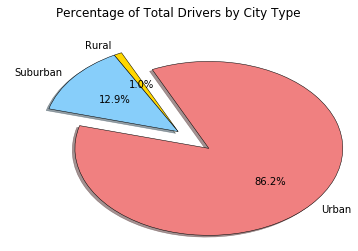

In [6]:
driver_sum = groupby_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 115, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percentage of Total Drivers by City Type')
plt.show()